# Prédiction du Genre des Films avec Naive Bayes

## Contexte du projet

Ce projet vise à prédire le genre d'un film en fonction de ses caractéristiques numériques telles que :
- Le nombre de votes
- La popularité
- La note moyenne
- La durée
- La date de sortie

Nous utiliserons un modèle de **Naive Bayes** pour effectuer cette classification.

---



## Modélisation avec Naive Bayes

---

### Import des bibliotheques

In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


---

### Chargement des données brutes

#### Chargement du fichier 

In [21]:
def load_data():
    df = pd.read_csv("data/TMDB_IMDB_MoviesDataset.csv")
    return df

df = load_data()


---

### Exploration initiale des donnees

#### Structure du dataset

In [22]:
def initial_exploration(df):
    
    print(f"\nStructure du dataset : ")
    
    print(f"Nombre de lignes : {df.shape[0]}")
    print(f"Nombre de colonnes : {df.shape[1]}")

    print("Noms des colonnes :")
    print(df.columns.tolist())
    
    print("Types de données :")
    print(df.dtypes)
    

initial_exploration(df)


Structure du dataset : 
Nombre de lignes : 435435
Nombre de colonnes : 29
Noms des colonnes :
['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'tconst', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'directors', 'writers', 'averageRating', 'numVotes', 'cast']
Types de données :
id                        int64
title                       str
vote_average            float64
vote_count                int64
status                      str
release_date                str
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path               str
budget                    int64
homepage                    str
tconst                      str
original_language           str
original_title              str
overview    

#### Analyse des colonnes


In [23]:
def analyze_columns(df):
   
    print(f"\n Analyse des colonnes")
    
    for col in df.columns:
        print(f"\n Colonne : {col}")
        print(f"   ➜ Type : {df[col].dtype}")
        print(f"   ➜ Valeurs manquantes : {df[col].isna().sum()}")
        print(f"   ➜ Valeurs uniques : {df[col].nunique()}")
        
        # Affiche les 5 valeurs les plus fréquentes (hors valeurs manquantes)
        top_values = df[col].value_counts(dropna=True).head(5)
        print("   ➜ Valeurs les plus fréquentes :")
        for val, freq in top_values.items():
            print(f"       {val} → {freq} occurrences")
    

analyze_columns(df)


 Analyse des colonnes

 Colonne : id
   ➜ Type : int64
   ➜ Valeurs manquantes : 0
   ➜ Valeurs uniques : 429212
   ➜ Valeurs les plus fréquentes :
       1300214 → 22 occurrences
       1362673 → 22 occurrences
       1418800 → 22 occurrences
       1414720 → 22 occurrences
       1476515 → 22 occurrences

 Colonne : title
   ➜ Type : str
   ➜ Valeurs manquantes : 0
   ➜ Valeurs uniques : 370169
   ➜ Valeurs les plus fréquentes :
       Die Hart 2: Die Harter → 1431 occurrences
       Die Hart: Die Harter → 1012 occurrences
       Emesis Blue → 648 occurrences
       Kickassia → 280 occurrences
       Spider-Man: Lotus → 231 occurrences

 Colonne : vote_average
   ➜ Type : float64
   ➜ Valeurs manquantes : 0
   ➜ Valeurs uniques : 4996
   ➜ Valeurs les plus fréquentes :
       0.0 → 166282 occurrences
       6.0 → 21772 occurrences
       5.0 → 20362 occurrences
       7.0 → 15516 occurrences
       8.0 → 9828 occurrences

 Colonne : vote_count
   ➜ Type : int64
   ➜ Valeurs manquant

### Préparation des données pour le modèle


#### Nettoyage des donnees

In [24]:

df = df.dropna(subset=[
    "genres",
    "numVotes",
    "averageRating",
    "runtime",
    "release_date"
])

print("Nombre de lignes après suppression :", len(df))


Nombre de lignes après suppression : 351578


In [25]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_date"] = df["release_date"].dt.year

#### Création de la variable cible

In [26]:
df["main_genre"] = df["genres"].apply(lambda x: x.split(",")[0])

df[["genres", "main_genre"]].head()


,genres,main_genre
0,"Action, Science Fiction, Adventure",Action
1,"Adventure, Drama, Science Fiction",Adventure
2,"Drama, Action, Crime, Thriller",Drama
3,"Action, Adventure, Fantasy, Science Fiction",Action
4,"Science Fiction, Action, Adventure",Science Fiction


#### Encodage des genres

In [27]:
encoder = LabelEncoder()
df["genre_encoded"] = encoder.fit_transform(df["main_genre"])

df[["main_genre", "genre_encoded"]].head()


,main_genre,genre_encoded
0,Action,0
1,Adventure,1
2,Drama,6
3,Action,0
4,Science Fiction,14


#### Sélection des features et de la target

In [28]:
X = df[["numVotes", "averageRating", "runtime", "release_date"]]
y = df["genre_encoded"]

print("Shape de X :", X.shape)
print("Shape de y :", y.shape)


Shape de X : (351578, 4)
Shape de y : (351578,)


#### Séparation train/test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train :", X_train.shape, y_train.shape)
print("Test  :", X_test.shape, y_test.shape)


Train : (281262, 4) (281262,)
Test  : (70316, 4) (70316,)


#### Normalisation des features

In [30]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Normalisation terminée")

Normalisation terminée


---

### Entraînement du modèle Naive Bayes

#### Modèle Gaussian Naive Bayes

In [31]:
model = GaussianNB()
model.fit(X_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


---

## Évaluation des performances

### Prédictions sur l'ensemble de test

In [32]:
y_pred = model.predict(X_test)

print("Prédictions terminées")
print("Exemple des 10 premières prédictions :", y_pred[:10])

Prédictions terminées
Exemple des 10 premières prédictions : [5 5 3 5 2 5 5 5 3 5]


### Accuracy

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy du modèle :", accuracy)

Accuracy du modèle : 0.20689459013595768


### Rapport de classification

In [34]:
print(classification_report(y_test, y_pred))
print(
    classification_report(
        y_test,
        y_pred,
        target_names=encoder.classes_
    )
)

              precision    recall  f1-score   support

           0       0.19      0.02      0.03      4056
           1       0.12      0.03      0.04      1439
           2       0.27      0.09      0.13      4135
           3       0.27      0.15      0.19     12695
           4       0.00      0.00      0.00      2135
           5       0.21      0.92      0.34     10890
           6       0.27      0.06      0.10     18940
           7       0.00      0.00      0.00      1170
           8       0.00      0.00      0.00       756
           9       0.00      0.00      0.00       481
          10       0.27      0.24      0.26      3900
          11       0.00      0.00      0.00      1481
          12       0.00      0.00      0.00       643
          13       0.00      0.00      0.00      2141
          14       0.00      0.00      0.00       973
          15       0.02      0.11      0.03       902
          16       0.00      0.00      0.00      2252
          17       0.00    

C:\Users\ashle\AppData\Roaming\Python\Python314\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ashle\AppData\Roaming\Python\Python314\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ashle\AppData\Roaming\Python\Python314\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

### Matrice de confusion

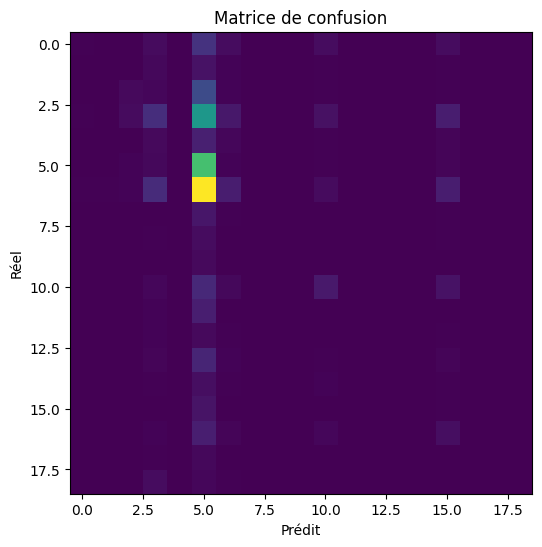

In [35]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
plt.imshow(cm)
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

---

## Analyse des probabilités

### Probabilitée pour chaque genre

In [36]:
y_proba = model.predict_proba(X_test)

proba_df = pd.DataFrame(
    y_proba,
    columns=encoder.classes_
)

proba_df.head()


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0.006419,0.002099,0.039285,0.090956,0.007934,0.536213,0.134708,0.009058,0.002445,0.003314,0.008630,0.025970,0.003547,0.017294,0.001475,0.097306,0.004287,0.003287,0.005772
1,0.004559,0.000811,0.043501,0.049465,0.002753,0.665990,0.068798,0.006554,0.001766,0.001789,0.015786,0.009452,0.001603,0.009275,0.002479,0.108367,0.005684,0.000865,0.000503
2,0.006184,0.009409,0.040224,0.259345,0.028020,0.192233,0.247703,0.005679,0.005591,0.008679,0.000786,0.042659,0.011828,0.039023,0.000327,0.007226,0.000821,0.015125,0.079139
3,0.000910,0.000154,0.005974,0.012612,0.000272,0.908144,0.014753,0.001696,0.000698,0.000788,0.003406,0.039120,0.000145,0.001073,0.001549,0.007887,0.000647,0.000169,0.000004
4,0.002332,0.005472,0.270158,0.201530,0.012164,0.242966,0.148421,0.003538,0.005558,0.008016,0.000274,0.031610,0.006008,0.018650,0.000236,0.001935,0.000229,0.008104,0.032798


### Importance des features (moyenne apprise)

In [37]:
feature_names = ["numVotes", "averageRating", "runtime", "release_date"]

means_df = pd.DataFrame(
    model.theta_,
    columns=feature_names,
    index=encoder.classes_
)

print("Moyennes des features par genre :")
print(means_df)


Moyennes des features par genre :
                 numVotes  averageRating   runtime  release_date
Action           0.205357      -0.450774  0.340916      0.112816
Adventure        0.357383      -0.244253  0.176337     -0.451076
Animation       -0.025008       0.190952 -0.787915     -0.351717
Comedy          -0.012497      -0.178436 -0.037311     -0.181737
Crime            0.076303      -0.132018  0.164771     -0.278947
Documentary     -0.091700       0.620778 -0.129616      0.342790
Drama           -0.020287       0.090442  0.103550     -0.026019
Family          -0.008580      -0.070049 -0.056201      0.078539
Fantasy          0.141330      -0.163211 -0.093665     -0.074219
History         -0.027262       0.285743  0.262429     -0.216449
Horror           0.014438      -0.890556 -0.038556      0.422077
Music           -0.075153       0.760900  0.138513     -0.153504
Mystery          0.025205      -0.178803  0.115561     -0.147902
Romance         -0.033013      -0.105301  0.225610      

---

## Prédiction sur de nouvelles données

In [38]:
nouveau_film = pd.DataFrame([{
    "numVotes": 500000,
    "averageRating": 8.5,
    "runtime": 140,
    "release_date": 2015
}])

nouveau_film_scaled = scaler.transform(nouveau_film)

prediction = model.predict(nouveau_film_scaled)
proba = model.predict_proba(nouveau_film_scaled)

print("Genre prédit :", encoder.inverse_transform(prediction)[0])
print("Probabilités par genre :")
print(pd.DataFrame(proba, columns=encoder.classes_))


Genre prédit : Adventure
Probabilités par genre :
         Action  Adventure     Animation        Comedy         Crime  \
0  5.326753e-07   0.999995  6.643583e-46  3.234702e-69  2.646743e-13   

   Documentary         Drama        Family       Fantasy       History  \
0          0.0  1.085161e-47  3.047422e-56  1.004031e-10  1.259252e-65   

         Horror  Music       Mystery        Romance  Science Fiction  \
0  1.378817e-62    0.0  2.174810e-38  2.335213e-114         0.000004   

   TV Movie      Thriller           War       Western  
0       0.0  7.835267e-28  4.440768e-40  2.055631e-71  
